In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3 as sql

db_filename = "dinofunworld-1.db"
connection = sql.connect(db_filename)

query = '''SELECT * FROM attraction'''

df = pd.read_sql_query(query, connection)
df.head ()

,index,AttractionID,Name,Region,Category,type
0,0,1,Wrightiraptor Mountain,Coaster Alley,Thrill Rides\r,Outdoor Coaster
1,1,2,Galactosaurus Rage,Coaster Alley,Thrill Rides\r,Outdoor Coaster
2,2,3,Auvilotops Express,Tundra Land,Thrill Rides\r,Outdoor Coaster
3,3,4,TerrorSaur,Wet Land,Thrill Rides\r,Other Ride
4,4,5,Wendisaurus Chase,Tundra Land,Thrill Rides\r,Outdoor Coaster


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3 as sql

db_filename = "dinofunworld-1.db"
connection = sql.connect(db_filename)

query2 = '''SELECT * FROM checkin'''

df = pd.read_sql_query(query2, connection)
df.head ()

,index,visitorID,timestamp,attraction,duration,type
0,0,436,2014-06-08 09:48:51,83,0:00:59,actual
1,1,436,2014-06-08 09:56:46,42,0:08:03,inferred
2,2,436,2014-06-08 10:14:04,6,0:06:16,actual
3,3,436,2014-06-08 10:29:38,5,1:07:41,actual
4,4,436,2014-06-08 11:38:55,49,0:08:43,inferred


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3 as sql

db_filename = "dinofunworld-1.db"
connection = sql.connect(db_filename)

query3 = '''SELECT * FROM sequences'''

df = pd.read_sql_query(query3, connection)
df.head ()

,index,visitorID,sequence
0,0,436,0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-...
1,1,878,0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-...
2,2,941,0-0-0-0-0-0-0-0-0-0-84-0-1-1-24-24-24-8-1-0-3-...
3,3,1197,0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-...
4,4,1217,0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-...


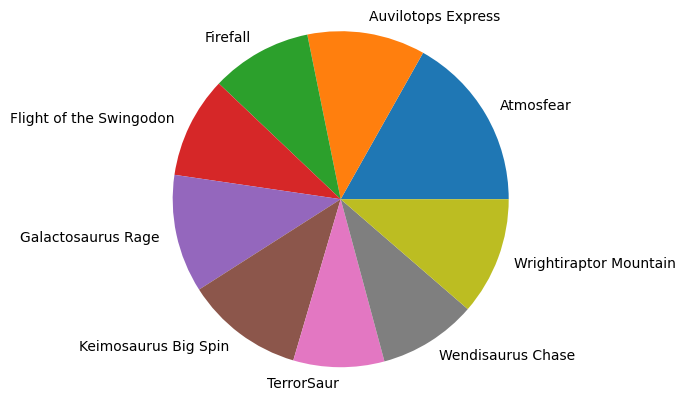

[['Atmosfear', 27747], ['Auvilotops Express', 18694], ['Firefall', 16024], ['Flight of the Swingodon', 16093], ['Galactosaurus Rage', 18717], ['Keimosaurus Big Spin', 18792], ['TerrorSaur', 14415], ['Wendisaurus Chase', 15577], ['Wrightiraptor Mountain', 18700]]


In [36]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from collections import Counter
%matplotlib inline

db_filename = "dinofunworld-1.db"
conn = sqlite3.connect(db_filename)
cursor = conn.cursor()

cursor.execute("SELECT attraction.name, count(*) FROM checkin, attraction WHERE checkin.attraction = attraction.attractionid AND LOWER(category) LIKE '%thrill rides%' GROUP BY attraction.name")
all_data = []
values = []
labels = []
for item in cursor.fetchall():
    all_data.append(list(item))
    values.append(item[1])
    labels.append(item[0])
    
plt.pie(values, labels=labels, shadow=False)
plt.axis('equal')
plt.show()
print(all_data)

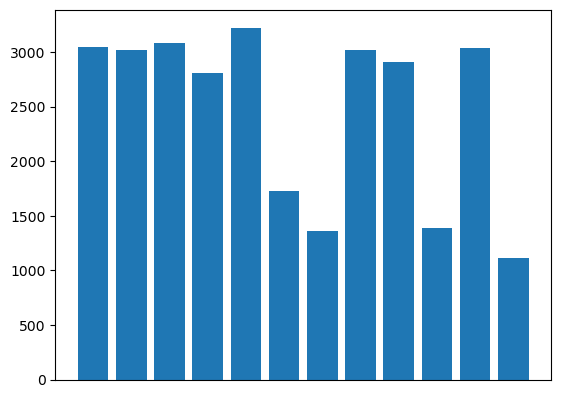

[['Chensational Sweets', 3049], ['EberTrex Fries', 3018], ['Floral Funnels', 3083], ['Granite Slab Pizza', 2810], ['Ice Age Cones', 3228], ['Krystal Cook Cafe', 1725], ['Paleo Shreckwiches', 1361], ['Permafrosties', 3018], ['Plaisantly Popped Corn', 2914], ["Shilobite o'Pizza", 1393], ['Smoky Wood BBQ', 3037], ['Theresaur Food Stop', 1116]]


In [37]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from collections import Counter
%matplotlib inline

db_filename = "dinofunworld-1.db"
conn = sqlite3.connect(db_filename)
cursor = conn.cursor()

cursor.execute("SELECT attraction.name, count(*) FROM checkin, attraction WHERE checkin.attraction = attraction.attractionid AND LOWER(category) LIKE '%food%' GROUP BY attraction.name")
all_data = []
values = []
labels = []
for item in cursor.fetchall():
    all_data.append(list(item))
    values.append(item[1])
    labels.append(item[0])
    
plt.bar(range(len(values)), values)
plt.xticks([])
plt.show()
print(all_data)

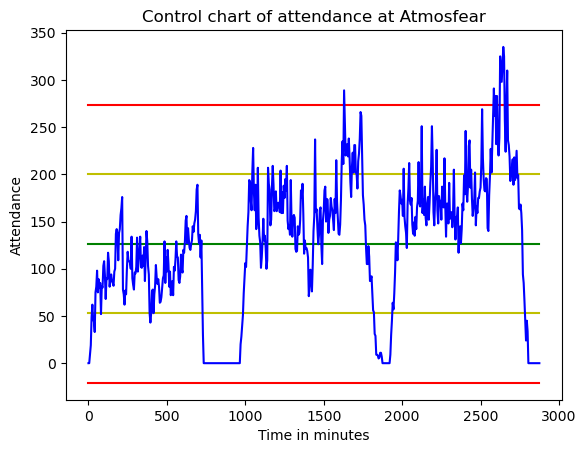

Mean = 126.359375, Standard Deviation = 73.63511071604992


In [40]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from collections import Counter
%matplotlib inline

db_filename = "dinofunworld-1.db"
conn = sqlite3.connect(db_filename)
cur = conn.cursor()

cur.execute("SELECT attractionId, Name FROM attraction where attraction.Name = 'Atmosfear';")
attractionID = cur.fetchone()[0]
cur.execute("SELECT visitorID, sequence FROM sequences where sequence LIKE '%" + str(attractionID) + "%';")
sequences = cur.fetchall()
sequence_stats = pd.DataFrame.from_records(sequences, columns=['visitor', 'sequence'])
sequence_stats['sequence_list'] = sequence_stats['sequence'] \
.apply(lambda s: [1 if x == str(attractionID) else 0 for x in s.split("-")])
attendance = np.sum(sequence_stats['sequence_list'].values.tolist(), axis=0)
#print(attendance)
mean = np.nanmean(attendance)
std = np.nanstd(attendance)
x_axis_list = range(0, len(attendance)*5, 5)
plt.plot(x_axis_list, [mean+2*std]*len(attendance), 'r-')
plt.plot(x_axis_list, [mean-2*std]*len(attendance), 'r-')
plt.plot(x_axis_list, [mean+std]*len(attendance), 'y-')
plt.plot(x_axis_list, [mean-std]*len(attendance), 'y-')
plt.plot(x_axis_list, [mean]*len(attendance), 'g-')
plt.plot(x_axis_list, attendance, 'b-')
plt.ylabel('Attendance')
plt.xlabel('Time in minutes')
plt.title('Control chart of attendance at Atmosfear')
plt.show()
print("Mean = " + str(mean) + ", Standard Deviation = " + str(std))

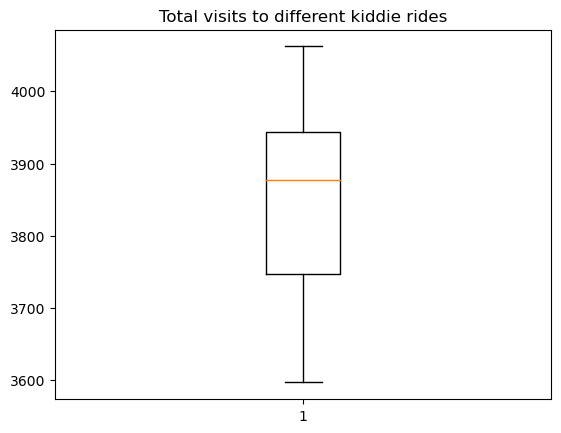

[3597, 3640, 3747, 3747, 3759, 3877, 3922, 3925, 3963, 4022, 4062]


In [41]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from collections import Counter
%matplotlib inline

db_filename = "dinofunworld-1.db"
conn = sqlite3.connect(db_filename)
cur = conn.cursor()

cur.execute("SELECT attraction.Name, count(checkin.visitorId) as c \
            FROM checkin LEFT JOIN attraction ON checkin.attraction = attraction.AttractionID \
            WHERE LOWER(attraction.Category) LIKE '%kiddie%' \
            GROUP BY attraction.Name \
            ORDER BY c;")
count_visits = cur.fetchall()
visit_stats = pd.DataFrame.from_records(count_visits, columns=['KiddieRideName', 'VisitCount'])
plt.boxplot(visit_stats['VisitCount'])
plt.title('Total visits to different kiddie rides')
plt.show()
print(visit_stats['VisitCount'].values.tolist())